task markers present


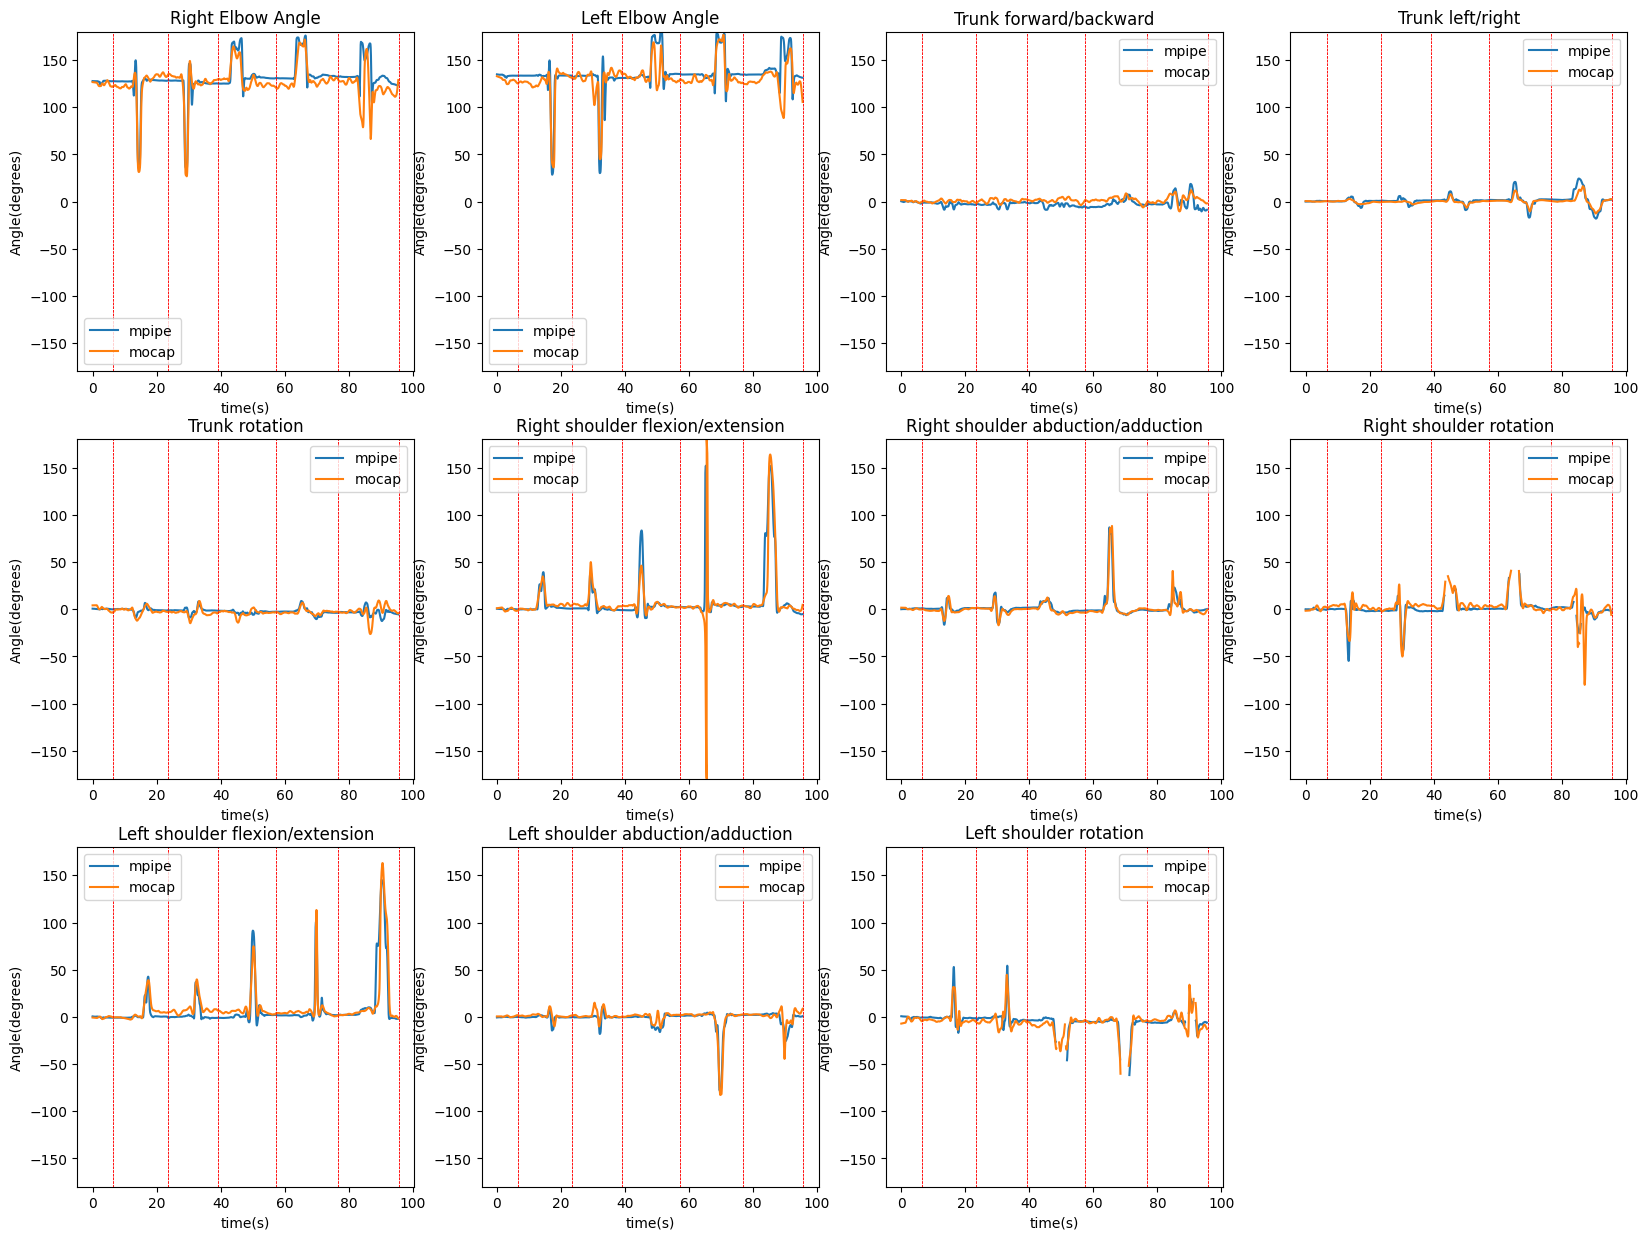

In [29]:
# importing the required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import json

# getting the session directory
current_directory = os.getcwd()
# Read the JSON file containing the Session Directory
with open(current_directory+'\\SessionDirectory.json', 'r') as file:
    session_data = json.load(file)
    
# Get the directory path from the JSON data
pth = session_data["directory"]

# importing the angle data
df = pd.read_csv(pth+'\\angles.csv')

# Create an 3x4 grid of subplots for ploting the angles against time
fig, axs = plt.subplots(3, 4, figsize=(20, 15))

# # Create an 3x4 grid of subplots for scatter plots
# fig, sps = plt.subplots(3, 4, figsize=(16, 12))

# check for tasks
task_present=False
try:
    # Read the JSON file and retrieve the dictionary
    filename = pth+"\\task_markers.json"
    with open(filename, 'r') as file:
        task_markers = json.load(file)
        task_no=len(task_markers)
        
    tasks=[]
    task_marker=0

    for i in df['epoch_time'].tolist():
        tasks.append(task_marker)
        if i-df['epoch_time'].tolist()[0] > task_markers['task'+str(task_marker)] and task_marker<task_no-1:
            task_marker+=1

    task_index=[]
    for i in range(1,task_no):
        index = tasks.index(i)
        task_index.append(index)

    tasks=pd.Series(tasks)

    df['task']=tasks
    task_present=True
    print('task markers present')
except:
    print('no task markers')

def pvt(y,t,name,subplot):
    subplot.plot(t,y,label=name)
    subplot.set_xlabel('time(s)')   
    subplot.set_ylabel('Angle(degrees)')
    subplot.set_xticks(np.arange(0, max(t)+20, 20))
    subplot.set_ylim(-180,180)
    subplot.legend()
    subplot.grid()
    if task_present:
        c=1
        for lines in task_markers.values():
            subplot.vlines(x=lines, ymin=-180, ymax=180, colors='r', linestyles='dashed',linewidth=0.5,label = "__nolegend__")
            c+=1
    subplot.legend()

epoch_time = df['epoch_time'].to_numpy()[0]
# Plot the graphs on each subplot

graph_titles=['Right Elbow Angle','Left Elbow Angle',
           'Trunk forward/backward','Trunk left/right', 'Trunk rotation',
           'Right shoulder flexion/extension','Right shoulder abduction/adduction','Right shoulder rotation',
            'Left shoulder flexion/extension','Left shoulder abduction/adduction' ,'Left shoulder rotation']

# getting the columns
df_col=df.columns.tolist()

# Ploting the angles against time
for i in range(1,12):
    row = int((i-1)/4)
    col = int((i-1)%4)
    pvt(df[df_col[i+ 0]].tolist(),df['epoch_time'].to_numpy()-epoch_time,'mpipe',axs[row,col])
    pvt(df[df_col[i+11]].tolist(),df['epoch_time'].to_numpy()-epoch_time,'mocap',axs[row,col])
    axs[row,col].set_title(graph_titles[i-1])

    # sps[row,col].scatter(df[df_col[i+ 0]].tolist(),df[df_col[i+11]].tolist(),label=graph_titles[i-1],s=5,marker='o',edgecolors='black',linewidth=0.1)

# Hide the empty last subplot
axs[2, 3].axis('off')
# sps[2, 3].axis('off')

plt.savefig(pth+'\\sub_graphs.png',dpi=600)
# Show the plot
plt.show()
